In [1]:
import datetime

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

In [3]:
day_string = '2013-07-11'
scenario_day=pd.Timestamp(day_string)

In [4]:
import os
os.chdir('/home/dominicyang/software/prescient/release/Prescient_2.0/sim')

In [5]:
import gosm.sources

sources = gosm.sources.sources_from_sources_file('gosm_test/bpa_shape_sourcelist.csv')

In [6]:
wind_source = sources[0]
wind_source.compute_derivatives('forecasts', end_date=scenario_day+datetime.timedelta(hours=23))

In [7]:
plt.figure()
wind_source.data['forecasts_derivatives'][:scenario_day].hist(bins=30)
plt.title('Historic Derivatives until {}'.format(day_string))

<IPython.core.display.Javascript object>

In [8]:
windows = [source.rolling_window(scenario_day) for source in sources]

In [9]:
windows[0].data.hist('forecasts', bins=30)

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41cdbf08d0>]], dtype=object)

In [10]:
wind_source = windows[0]

wind_source.data['errors'] = wind_source.data['actuals'] - wind_source.data['forecasts']

In [11]:
wind_source.all_data

,actuals,errors,forecasts,forecasts_derivatives
datetimes,,,,
2012-06-02 00:00:00,1684,-524.0,2208,25.679608
2012-06-02 01:00:00,2054,-194.0,2248,54.324537
2012-06-02 02:00:00,2166,-137.0,2303,50.768830
2012-06-02 03:00:00,1926,-422.0,2348,39.257192
2012-06-02 04:00:00,1928,-449.0,2377,5.015154
2012-06-02 05:00:00,2077,-272.0,2349,-46.033807
2012-06-02 06:00:00,1939,-361.0,2300,-65.712651
2012-06-02 07:00:00,1999,-249.0,2248,7.252080
2012-06-02 08:00:00,1799,-513.0,2312,107.252080


In [12]:
derivatives = wind_source.all_data['forecasts_derivatives'].values

In [13]:
import gosm.derivative_patterns.derivative_patterns as dp
bounds = dp.get_derivative_bounds(derivatives, [0.3,0.7])

In [14]:
bounds

(-46.56358284623245, 30.88759970780029)

In [15]:
wind_source.compute_patterns('forecasts_derivatives', [0.3, 0.7])

In [16]:
wind_source.all_data

,actuals,errors,forecasts,forecasts_derivatives,forecasts_derivatives_patterns
datetimes,,,,,
2012-06-02 00:00:00,1684,-524.0,2208,25.679608,"(0, 0, 1)"
2012-06-02 01:00:00,2054,-194.0,2248,54.324537,"(0, 1, 1)"
2012-06-02 02:00:00,2166,-137.0,2303,50.768830,"(1, 1, 1)"
2012-06-02 03:00:00,1926,-422.0,2348,39.257192,"(1, 1, 0)"
2012-06-02 04:00:00,1928,-449.0,2377,5.015154,"(1, 0, 0)"
2012-06-02 05:00:00,2077,-272.0,2349,-46.033807,"(0, 0, -1)"
2012-06-02 06:00:00,1939,-361.0,2300,-65.712651,"(0, -1, 0)"
2012-06-02 07:00:00,1999,-249.0,2248,7.252080,"(-1, 0, 1)"
2012-06-02 08:00:00,1799,-513.0,2312,107.252080,"(0, 1, 1)"


In [17]:
all_data = wind_source.all_data
import gosm.derivative_patterns.derivative_patterns as dp
pattern_dictionary = {}  # maps patterns to lists of dates with pattern                  
for dt in all_data.index:                                               
    # We need to call any, since the data is a tuple                    
    if np.isnan(all_data['forecasts_derivatives_patterns'][dt]).any():                       
        continue                                                        

    pattern = all_data['forecasts_derivatives_patterns'][dt]                                 
    if pattern in pattern_dictionary:                                   
        pattern_dictionary[pattern].append(dt)                          
    else:                                                               
        pattern_dictionary[pattern] = [dt]

In [18]:
wind_source.all_data['2013-03-09']

,actuals,errors,forecasts,forecasts_derivatives,forecasts_derivatives_patterns
datetimes,,,,,
2013-03-09 00:00:00,136,-149.0,285,80.121979,"(1, 1, 1)"
2013-03-09 01:00:00,218,-128.0,346,41.877027,"(1, 1, 1)"
2013-03-09 02:00:00,267,-129.0,396,67.760587,"(1, 1, 1)"
2013-03-09 03:00:00,331,-139.0,470,69.402125,"(1, 1, 1)"
2013-03-09 04:00:00,393,-139.0,532,55.326102,"(1, 1, 1)"
2013-03-09 05:00:00,420,-163.0,583,46.780033,"(1, 1, 1)"
2013-03-09 06:00:00,372,-252.0,624,34.183465,"(1, 1, 0)"
2013-03-09 07:00:00,314,-326.0,640,-19.326088,"(1, 0, -1)"
2013-03-09 08:00:00,286,-303.0,589,-91.884367,"(0, -1, 0)"


<IPython.core.display.Javascript object>


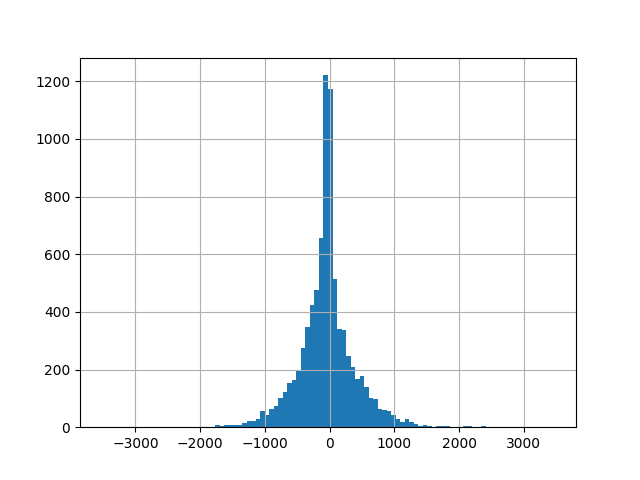

In [20]:
plt.figure()
wind_source.historic_data['errors'].hist(bins=100)

In [21]:
pattern_enough_data = [pattern for pattern in pattern_dictionary if len(pattern_dictionary[pattern]) > 20]

In [22]:
pattern_enough_data

[(0, 1, 1),
 (1, -1, -1),
 (-1, 0, -1),
 (0, 0, 1),
 (1, 0, 1),
 (0, 0, 0),
 (-1, -1, -1),
 (1, 1, 1),
 (-1, -1, 0),
 (1, 1, 0),
 (1, 1, -1),
 (0, 0, -1),
 (1, 0, -1),
 (0, -1, -1),
 (1, 0, 0),
 (-1, 0, 1),
 (-1, 0, 0),
 (0, 1, 0),
 (0, -1, 0)]

In [23]:
pattern_errors = pd.DataFrame(index=pd.date_range('2000-01-01', '2020-01-01', freq='H'))
for pattern in pattern_enough_data:
    pattern_errors[pattern] = wind_source.all_data[wind_source.all_data['forecasts_derivatives_patterns'] == pattern]['errors']

<IPython.core.display.Javascript object>


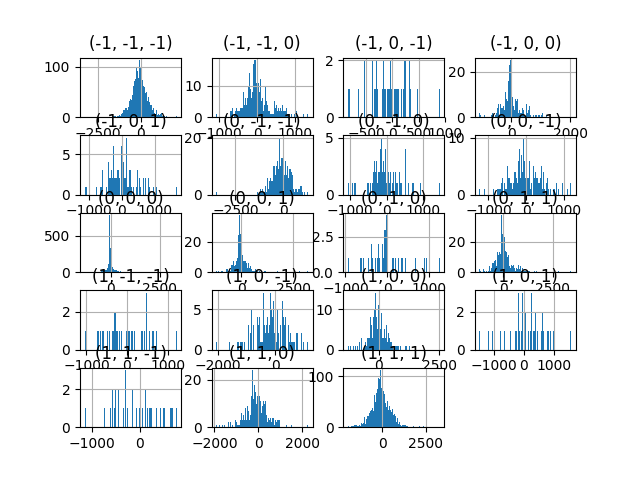

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41cb6d2208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f41cb177c50>]], dtype=object)

In [24]:
pattern_errors.hist(bins=100)

In [25]:
wind_source.cluster('forecasts_derivatives_patterns', error_distribution_domain='4')

In [26]:
list(wind_source.historic_data['forecasts_derivatives_patterns_clusters'].unique())

[((-1, -1, 0),
  (-1, 0, 0),
  (-1, 0, 1),
  (0, -1, 0),
  (0, 0, -1),
  (0, 0, 0),
  (0, 0, 1),
  (0, 1, 0),
  (0, 1, 1),
  (1, 0, 0),
  (1, 1, 1),
  (0, -1, 1),
  (-1, 1, 0),
  (-1, -1, 1),
  (-1, 1, 1),
  (1, -1, 0),
  (0, 1, -1)),
 ((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0, -1), (1, 0, 1), (1, 1, 0)),
 ((1, -1, -1), (1, 1, -1)),
 nan]

<IPython.core.display.Javascript object>


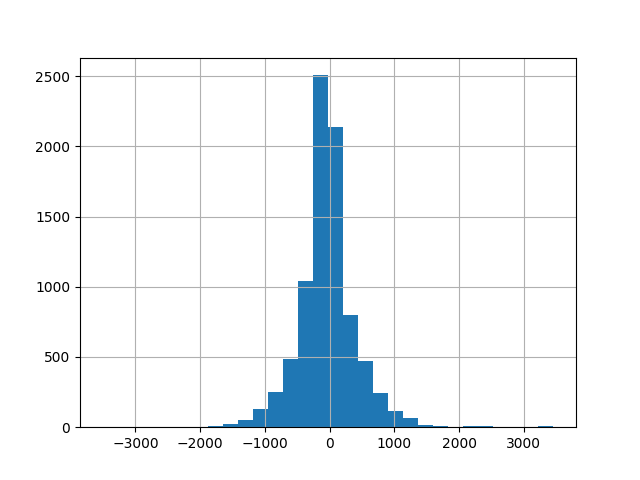

In [27]:
plt.figure()
wind_source.historic_data['errors'].hist(bins=30)

<IPython.core.display.Javascript object>


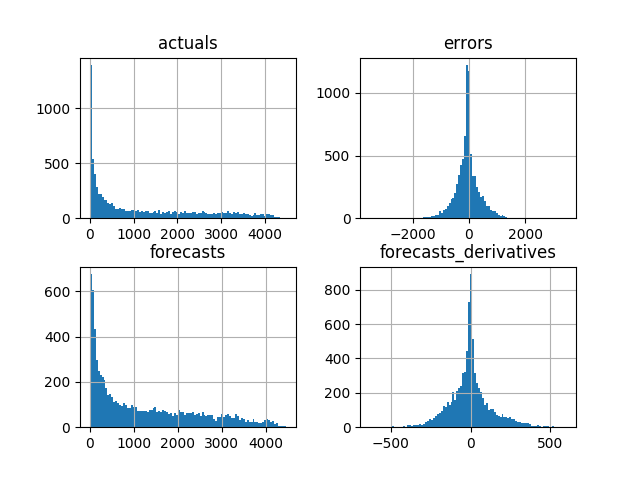

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41c7d39828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f41c78b5240>]], dtype=object)

In [28]:
wind_source.data.hist(bins=100)

<IPython.core.display.Javascript object>


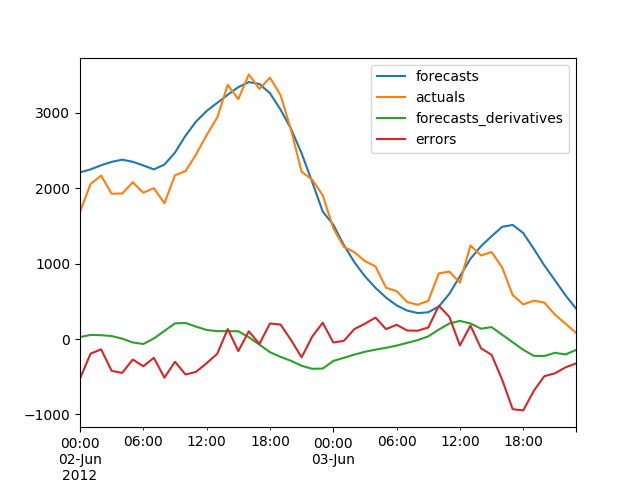

In [29]:
wind_source.data['2012-06-02':'2012-06-03'].plot()

WINDOW:  0.6 1
WINDOW:  0.4703584613552459 0.870358461355246
WINDOW:  0.6 1


<IPython.core.display.Javascript object>


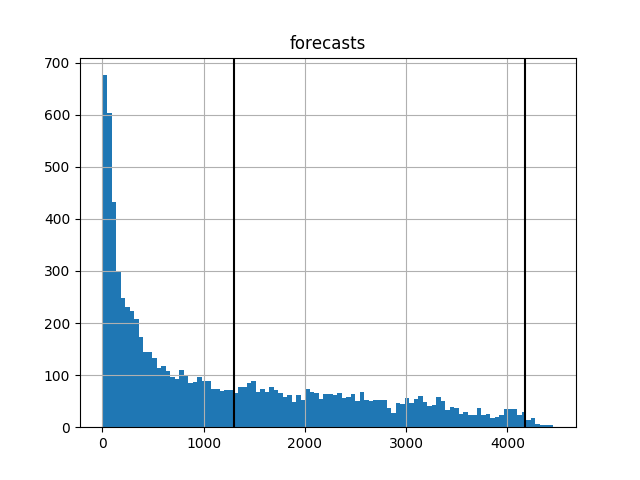

Length of Entire Dataset:  8396
Length of Segment:  67
Minimum:  1304 Maximum:  4176


In [30]:
time_1 = scenario_day + datetime.timedelta(hours=0)
time_2 = scenario_day + datetime.timedelta(hours=11)
time_3 = scenario_day + datetime.timedelta(hours=23)

dps_1 = wind_source.segment(time_1)
dps_2 = wind_source.segment(time_2)
dps_3 = wind_source.segment(time_3)


def plot_window(segment, field):
    fig, ax1 = plt.subplots()

    wind_source.data.hist(field, bins=100, ax=ax1)

    smallest = min(segment.data[field])
    largest = max(segment.data[field])
    ax1.axvline(x=smallest, color='black')
    ax1.axvline(x=largest, color='black')

    print("Length of Entire Dataset: ", len(wind_source.data))
    print("Length of Segment: ", len(segment.data))
    print("Minimum: ", smallest, "Maximum: ", largest)

plot_window(dps_1, 'forecasts')

In [31]:
import gosm.segmenter
window_crit = gosm.segmenter.Criterion('Wind', 'forecasts', 'window', 0.4)

In [84]:
distr = UnivariateEmpiricalDistribution(list(wind_source.all_data['forecasts']))
distr.cdf_inverse(0.870358461355246)

2922.2886030725267

WINDOW:  0.4703584613552459 0.870358461355246


<IPython.core.display.Javascript object>


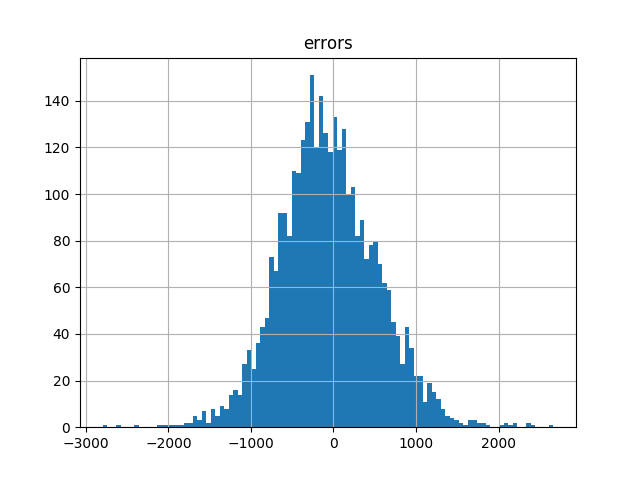

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41c75c7ba8>]], dtype=object)

In [32]:
window = wind_source.segment_by_window(criterion=window_crit, dt=time_2)
window.data.hist('errors', bins=100)

<IPython.core.display.Javascript object>


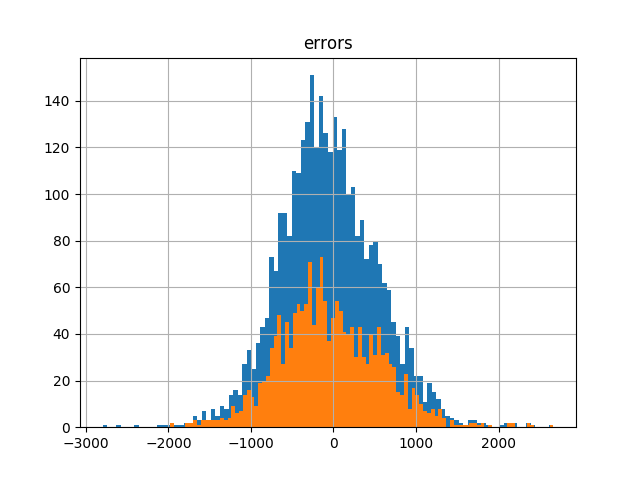

In [34]:
shape_crit = gosm.segmenter.Criterion('Wind', 'forecasts', 'shape')
window.data.hist('errors', bins=100)
window.segment_by_shape(time_2, shape_crit).data['errors'].hist(bins=100)

<IPython.core.display.Javascript object>


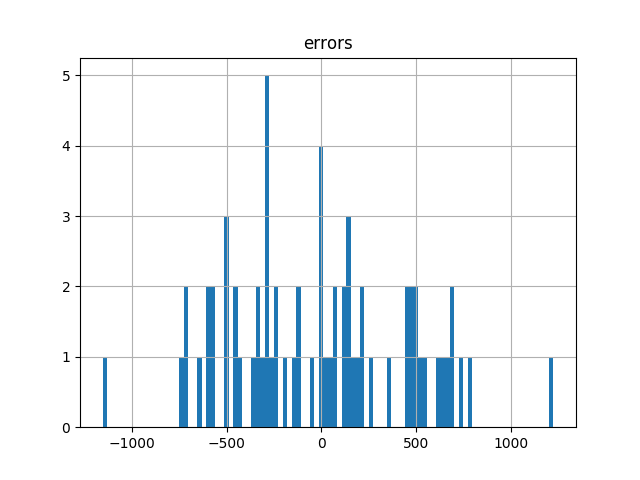

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41c6f15470>]], dtype=object)

In [36]:
dps_1.data.hist('errors', bins=100)

<IPython.core.display.Javascript object>


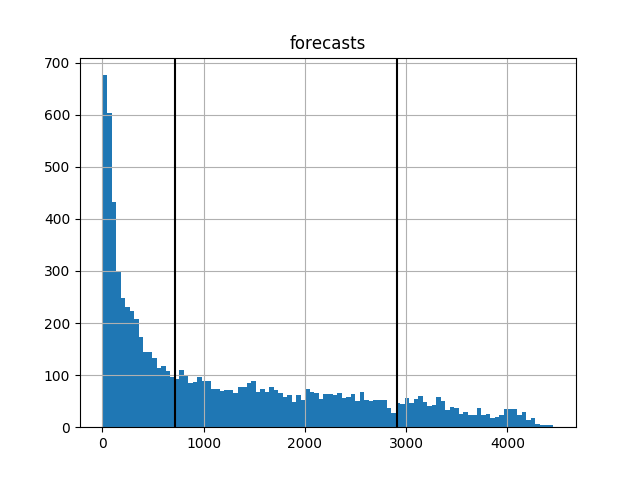

Length of Entire Dataset:  8396
Length of Segment:  1739
Minimum:  716 Maximum:  2909


In [38]:
plot_window(dps_2, 'forecasts')

In [40]:
for dt in error_series_2.index:
    if dt not in dps_2.data.index:
        print(dt)

2012-12-19 08:00:00
2013-04-10 12:00:00


In [41]:
wind_source.dayahead_data[day_string]

,forecasts,actuals,forecasts_derivatives,forecasts_derivatives_patterns,forecasts_derivatives_patterns_clusters
datetimes,,,,,
2013-07-11 00:00:00,3269,3053,-239.627896,"(1, -1, -1)","((1, -1, -1), (1, 1, -1))"
2013-07-11 01:00:00,3057,2672,-195.482515,"(-1, -1, -1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-07-11 02:00:00,2886,2539,-103.860708,"(-1, -1, -1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-07-11 03:00:00,2823,2895,-90.852885,"(-1, -1, -1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-07-11 04:00:00,2700,2851,-144.499652,"(-1, -1, -1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-07-11 05:00:00,2530,2791,-182.552935,"(-1, -1, -1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-07-11 06:00:00,2348,2721,-183.999879,"(-1, -1, -1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-07-11 07:00:00,2142,2490,-238.087778,"(-1, -1, -1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-07-11 08:00:00,1933,2732,-149.490486,"(-1, -1, -1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."


In [60]:
wind_source.data['2013-04-10']

,forecasts,actuals,forecasts_derivatives,errors,forecasts_derivatives_patterns,forecasts_derivatives_patterns_clusters
datetimes,,,,,,
2013-04-10 00:00:00,770,1542,67.585405,772,"(0, 1, 1)","((-1, -1, 0), (-1, 0, 0), (-1, 0, 1), (0, -1, ..."
2013-04-10 01:00:00,852,1622,96.714898,770,"(1, 1, 0)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-04-10 02:00:00,925,1504,29.251477,579,"(1, 0, 1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-04-10 03:00:00,951,1824,73.898709,873,"(0, 1, 1)","((-1, -1, 0), (-1, 0, 0), (-1, 0, 1), (0, -1, ..."
2013-04-10 04:00:00,1058,1740,127.603718,682,"(1, 1, 1)","((-1, -1, 0), (-1, 0, 0), (-1, 0, 1), (0, -1, ..."
2013-04-10 05:00:00,1188,1497,97.100092,309,"(1, 1, 0)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-04-10 06:00:00,1313,1548,29.247208,235,"(1, 0, 1)","((-1, -1, -1), (-1, 0, -1), (0, -1, -1), (1, 0..."
2013-04-10 07:00:00,1349,1541,64.976824,192,"(0, 1, 1)","((-1, -1, 0), (-1, 0, 0), (-1, 0, 1), (0, -1, ..."
2013-04-10 08:00:00,1396,1567,164.976824,171,"(1, 1, 1)","((-1, -1, 0), (-1, 0, 0), (-1, 0, 1), (0, -1, ..."


In [43]:
min(dps_2.data['forecasts'])

716

<IPython.core.display.Javascript object>


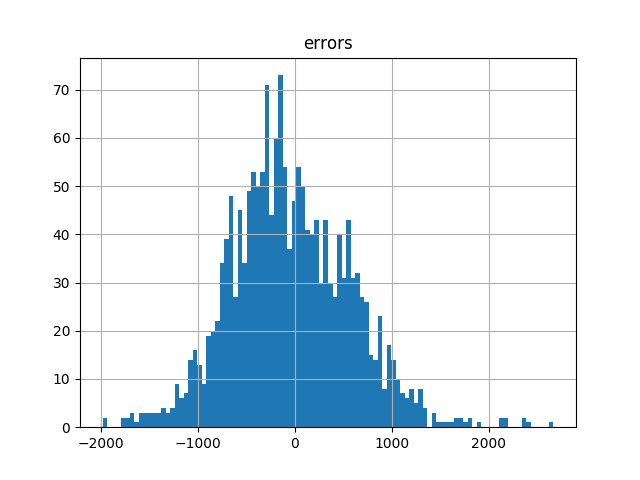

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41c6aae908>]], dtype=object)

In [44]:
dps_2.data.hist('errors', bins=100)

<IPython.core.display.Javascript object>


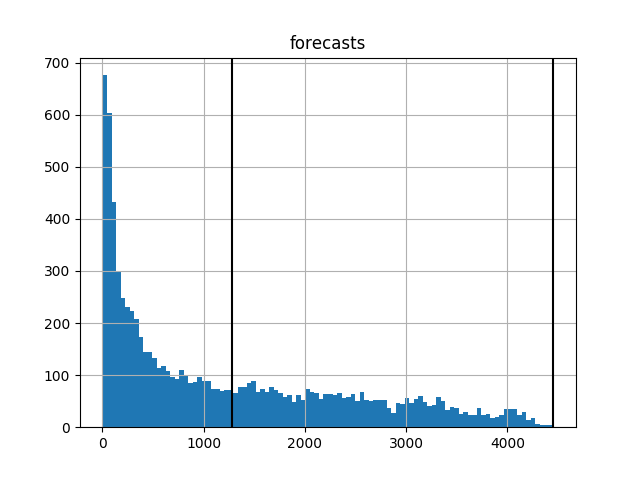

Length of Entire Dataset:  8396
Length of Segment:  1574
Minimum:  1278 Maximum:  4455


In [45]:
plot_window(dps_3, 'forecasts')

<IPython.core.display.Javascript object>


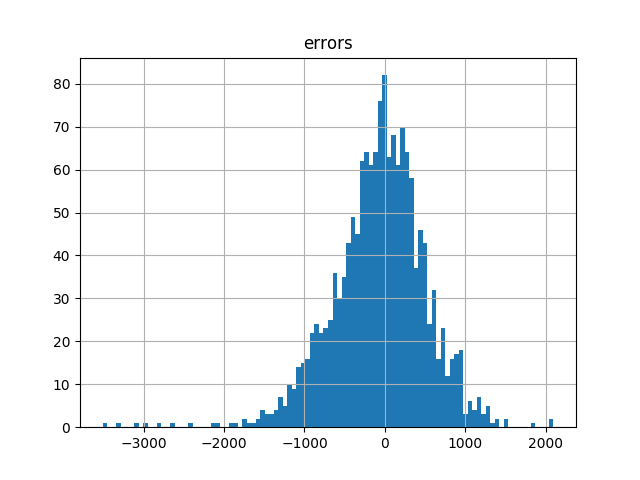

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41c6748c18>]], dtype=object)

In [46]:
dps_3.data.hist('errors', bins=100)

In [47]:
import gosm.distributions.distributions as distributions

epispline_1 = distributions.UnivariateEpiSplineDistribution(list(dps_1.data['errors']),
                seg_N=20, seg_kappa=100, non_negativity_constraint_distributions=0,
                probability_constraint_of_distributions=1, nonlinear_solver='ipopt',
                error_distribution_domain='4')

epispline_2 = distributions.UnivariateEpiSplineDistribution(list(dps_2.data['errors']),
                seg_N=20, seg_kappa=100, non_negativity_constraint_distributions=0,
                probability_constraint_of_distributions=1, nonlinear_solver='ipopt',
                error_distribution_domain='4')

epispline_3 = distributions.UnivariateEpiSplineDistribution(list(dps_3.data['errors']),
                seg_N=20, seg_kappa=100, non_negativity_constraint_distributions=0,
                probability_constraint_of_distributions=1, nonlinear_solver='ipopt',
                error_distribution_domain='4')

<IPython.core.display.Javascript object>


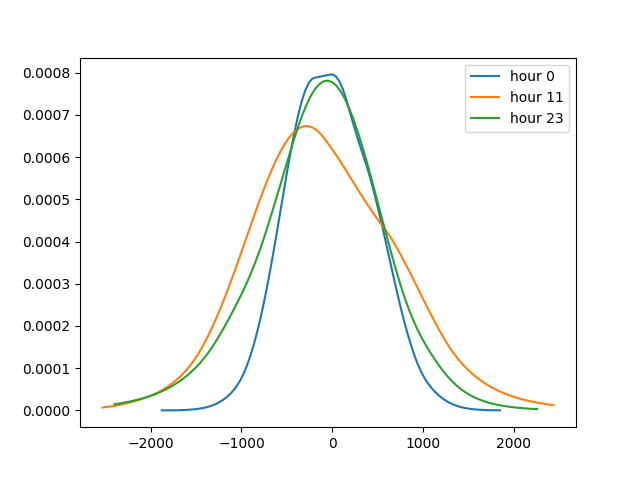

In [48]:
def plot_pdf():
    xs1 = np.linspace(epispline_1.alpha, epispline_1.beta, 100)
    ys1 = [epispline_1.pdf(x) for x in xs1]
    
    xs2 = np.linspace(epispline_2.alpha, epispline_2.beta, 100)
    ys2 = [epispline_2.pdf(x) for x in xs1]
    
    xs3 = np.linspace(epispline_3.alpha, epispline_3.beta, 100)
    ys3 = [epispline_3.pdf(x) for x in xs1]
    
    fig, ax = plt.subplots()
    ax.plot(xs1, ys1, label='hour 0')
    ax.plot(xs2, ys2, label='hour 11')
    ax.plot(xs3, ys3, label='hour 23')
    plt.legend()

plot_pdf()

<IPython.core.display.Javascript object>


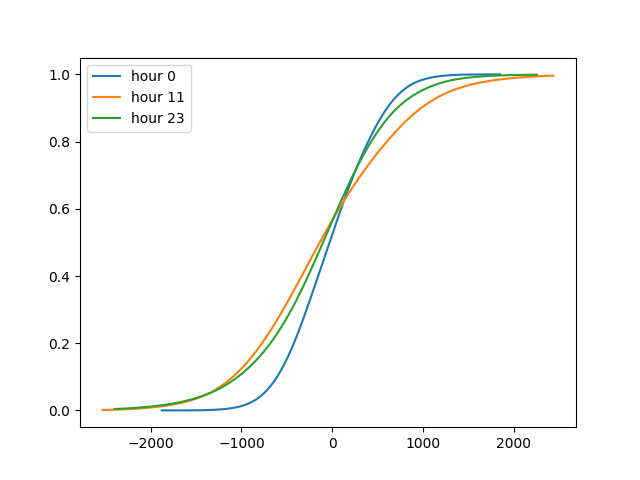

In [50]:
def plot_cdf():
    xs1 = np.linspace(epispline_1.alpha, epispline_1.beta, 100)
    ys1 = [epispline_1.cdf(x) for x in xs1]
    
    xs2 = np.linspace(epispline_2.alpha, epispline_2.beta, 100)
    ys2 = [epispline_2.cdf(x) for x in xs1]
    
    xs3 = np.linspace(epispline_3.alpha, epispline_3.beta, 100)
    ys3 = [epispline_3.cdf(x) for x in xs1]
    
    fig, ax = plt.subplots()
    ax.plot(xs1, ys1, label='hour 0')
    ax.plot(xs2, ys2, label='hour 11')
    ax.plot(xs3, ys3, label='hour 23')
    plt.legend()
    
plot_cdf()

In [52]:
import gosm.skeleton_point_paths

In [53]:
dps, paths, _ = gosm.skeleton_point_paths.parse_dps_path_file('Wind', 'gosm_test/SC1_cutpoints.dat')

In [54]:
test_path = paths[0]

In [55]:
pattern_set = gosm.hyperrectangles.one_dimensional_pattern_set_from_file('gosm_test/hyperrectangle_names_1source.dat', ['Wind'])

skel_path = test_path.to_skeleton_paths(dps, pattern_set)[0]

TypeError: unhashable type: 'list'

In [56]:
print(skel_path)

NameError: name 'skel_path' is not defined

In [ ]:
cutpoints = [0,0.1,0.9,1]

def skeleton_points(distribution, cutpoints):
    xs = [distribution.cdf_inverse(y, cdf_inverse_tolerance=1e-4, cdf_inverse_max_refinements=10) for y in cutpoints]
    points = []
    for i, (a, b) in enumerate(zip(xs, xs[1:])):
        x = distribution.region_expectation((a,b))
        points.append(x/(cutpoints[i+1] - cutpoints[i]))
    return points

skeleton_1 = skeleton_points(epispline_1, [0,0.1,0.9,1])

In [ ]:
skeleton_2 = skeleton_points(epispline_2, [0,0.1,0.9,1])

In [ ]:
skeleton_3 = skeleton_points(epispline_3, [0,0.1,0.9,1])

In [ ]:
print(skeleton_1, skeleton_2, skeleton_3, sep='\n')

In [ ]:
ys = [epispline_1._normalized_cdf(x) for x in np.linspace(0, 1, 21)]

In [ ]:
np.interp(0.1, ys, np.linspace(0, 1, 21))

In [69]:
xs_1 = [epispline_1.cdf_inverse(y) for y in cutpoints]
xs_2 = [epispline_2.cdf_inverse(y) for y in cutpoints]
xs_3 = [epispline_3.cdf_inverse(y) for y in cutpoints]
print(xs_1, xs_2, xs_3, sep='\n')

NameError: name 'cutpoints' is not defined

In [ ]:
xs = [epispline_1._cdf_inverse(y) for y in cutpoints]
xs

In [ ]:
def normalize(x, alpha, beta):
    return (x - alpha) / (beta - alpha)

print([normalize(x, epispline_1.alpha, epispline_1.beta) for x in xs_1])
print([normalize(x, epispline_2.alpha, epispline_2.beta) for x in xs_2])
print([normalize(x, epispline_3.alpha, epispline_3.beta) for x in xs_3])

In [ ]:
def scale(x, alpha, beta):
    return x * (beta - alpha) + alpha
x1, x2 = scale(xs[0], epispline_1.alpha, epispline_1.beta), scale(xs[1], epispline_1.alpha, epispline_1.beta)

In [ ]:
epispline_1.region_expectation((x1, float(x2)))

In [ ]:
print(epispline_1.alpha, epispline_1.beta)
print(epispline_2.alpha, epispline_2.beta)
print(epispline_3.alpha, epispline_3.beta)

In [ ]:
fig, ax = plt.subplots()
def plot_skeleton_points(distribution, cutpoints, skeleton):
    xs = [distribution.cdf_inverse(y, cdf_inverse_tolerance=1e-4, cdf_inverse_max_refinements=10) for y in cutpoints]
    xvals = np.linspace(distribution.alpha, distribution.beta, 100)
    yvals = [distribution.pdf(xval) for xval in xvals]
    

    ax.plot(xvals, yvals)
    for x in xs:
        ax.axvline(x, color='black')
    
    for skeleton_point in skeleton:
        ax.plot([skeleton_point], [distribution.pdf(skeleton_point)], 'rx')

plot_skeleton_points(epispline_1, cutpoints, skeleton_1)
plot_skeleton_points(epispline_2, cutpoints, skeleton_2)
plot_skeleton_points(epispline_3, cutpoints, skeleton_3)

In [ ]:
skeleton_1, skeleton_2, skeleton_3

In [ ]:
forecast_1 = wind_source.dayahead_data['forecasts'][time_1]
forecast_2 = wind_source.dayahead_data['forecasts'][time_2]
forecast_3 = wind_source.dayahead_data['forecasts'][time_3]

dps_1_skeleton = [forecast_1 + error for error in skeleton_1]
dps_2_skeleton = [forecast_2 + error for error in skeleton_2]
dps_3_skeleton = [forecast_3 + error for error in skeleton_3]

In [ ]:
dps_1_skeleton, dps_2_skeleton, dps_3_skeleton